# Data Loading and Analyzing

In [1]:
import os
import tensorflow

In [2]:
dataset_dir = 'D:/Pythonn/Jasmine-Mani/Food Classification'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255 , validation_split=0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'categorical',
    subset = 'training'
)

Found 5024 images belonging to 20 classes.


In [6]:
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode='categorical',
    subset = 'validation'
)

Found 1245 images belonging to 20 classes.


In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
images , label = next(train_generator)

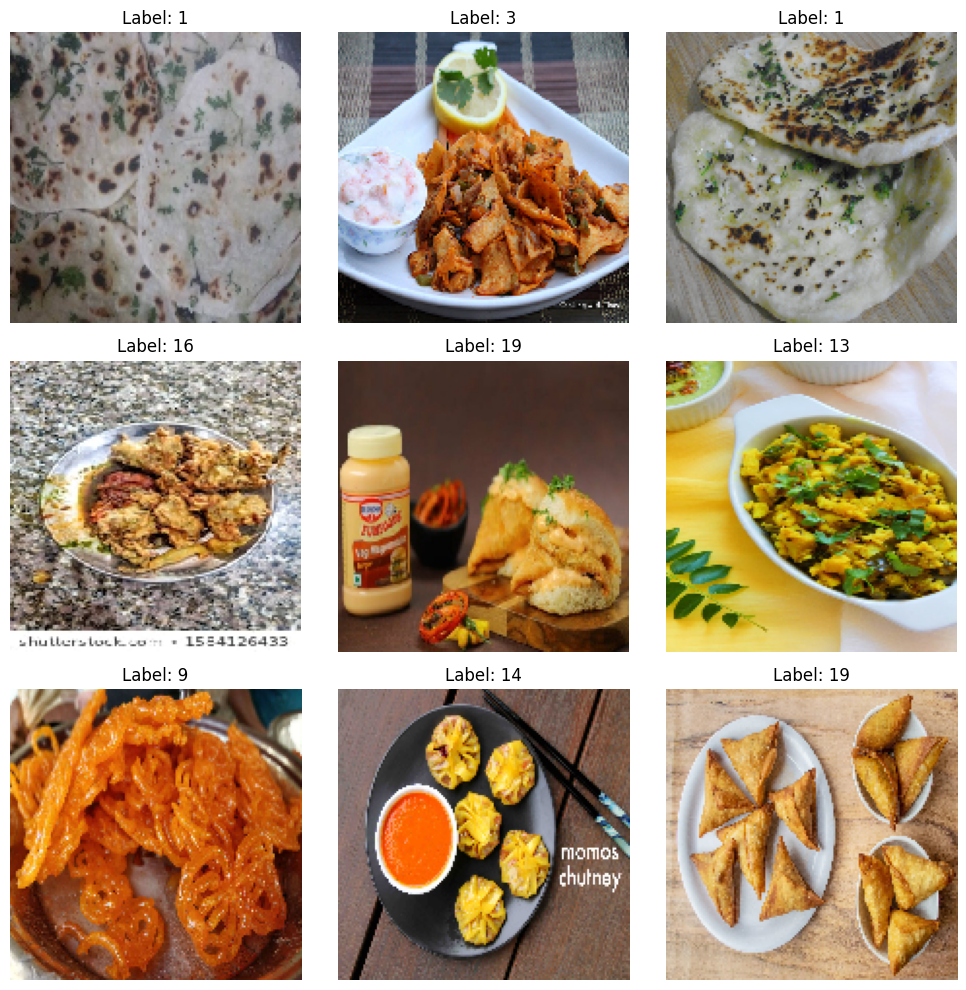

In [9]:
plt.figure(figsize = (10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f"Label: {np.argmax(label[i])}")

plt.tight_layout()
plt.show()

# Data Augmentation

In [10]:
fnames = [os.path.join('D:/Pythonn/Jasmine-Mani/Food Classification/dhokla',fname) 
          for fname in os.listdir('D:/Pythonn/Jasmine-Mani/Food Classification/dhokla')]
img_path = fnames[3]

In [11]:
example_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [12]:
from tensorflow.keras.preprocessing import image

In [13]:
img = image.load_img(img_path , target_size=(150,150))

In [14]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

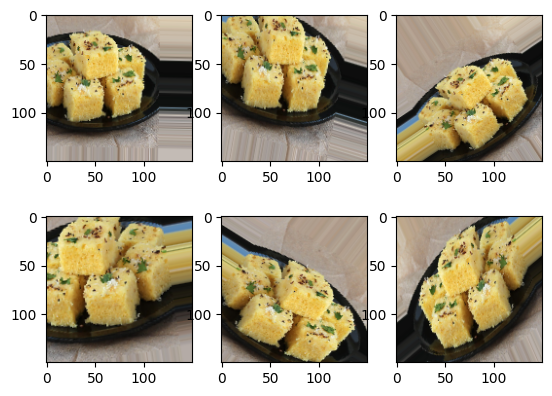

In [15]:
i = 0
for batch in example_datagen.flow(x , batch_size=1):
    plt.subplot(2,3,i+1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%6 == 0:
        break
plt.show()    

In [16]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split=0.2,
)

In [17]:
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode='categorical',
    subset = 'training'
)

Found 5024 images belonging to 20 classes.


In [18]:
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode='categorical',
    subset = 'validation'
)

Found 1245 images belonging to 20 classes.


In [19]:
len(train_generator)

157

# Model Building

In [20]:
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten, Dense , Dropout
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(32,(3,3) , activation='relu' , input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.add(Conv2D(64,(3,3) , activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3) , activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3) , activation='relu'))
model.add(MaxPooling2D((2,2)))

In [24]:
model.add(Flatten())
model.add(Dropout(0.5))

In [25]:
model.add(Dense(512, activation='relu'))
model.add(Dense(20,activation='softmax'))

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,462,868 (13.21 MB)

 Trainable params: 3,462,868 (13.21 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.optimizers import Adam

In [28]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate=0.0001),
    metrics = ['accuracy']
)

In [45]:
model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps=50
)

Epoch 1/5


C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.0657 - loss: 2.9869 - val_accuracy: 0.1309 - val_loss: 2.8151
Epoch 2/5


C:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 844ms/step - accuracy: 0.1164 - loss: 2.8377 - val_accuracy: 0.1430 - val_loss: 2.6969
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.1126 - loss: 2.7638 - val_accuracy: 0.1799 - val_loss: 2.5676
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 676ms/step - accuracy: 0.1667 - loss: 2.6970 - val_accuracy: 0.2096 - val_loss: 2.4936
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.1893 - loss: 2.5778 - val_accuracy: 0.2635 - val_loss: 2.3478
